# 🍎 IoT Mini Project: Rotten Fruit Detection Part

**Student:** Kadir Akyürek
**Course:** Internet of Things (IoT)

## 📝 Project Overview
This notebook implements an object detection model to distinguish between fresh and rotten apples. Optimized for IoT edge devices, the system uses YOLOv8 to achieve real-time performance with low latency.

Used Dataset : https://universe.roboflow.com/master-pfe-2025/fruits-fresh-and-rotten

In [1]:

!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 83.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xfXTYlISuqmS2Wum0E4E")
project = rf.workspace("master-pfe-2025").project("fruits-fresh-and-rotten")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fruits-Fresh-and-Rotten-2 in yolov8:: 100%|██████████| 87176/87176 [00:16<00:00, 5196.54it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
from ultralytics import YOLO


model = YOLO('yolov8n.pt')

results = model.train(
    data='/content/Fruits-Fresh-and-Rotten-2/data.yaml',
    epochs=10,
    imgsz=320,
    batch=64,
    device=0,
    workers=2,
    name='fast'
)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Fruits-Fresh-and-Rotten-2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fast2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

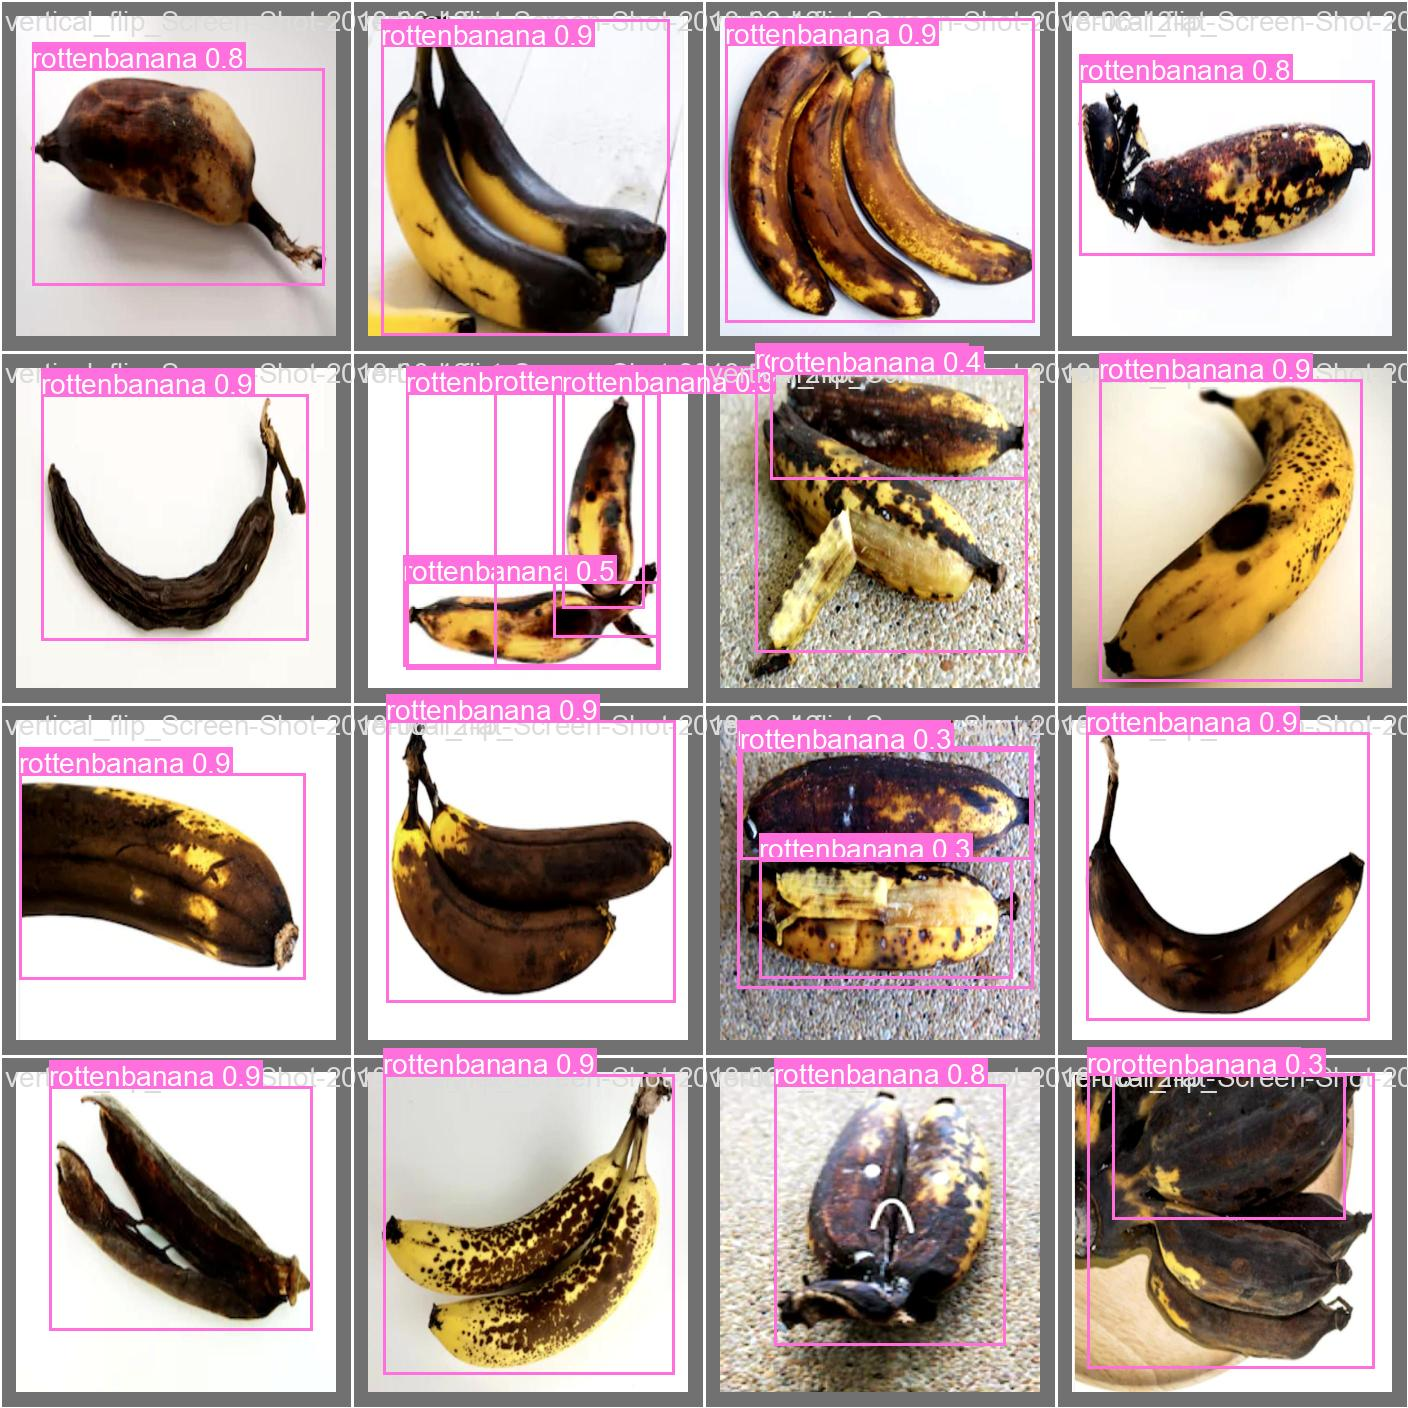

In [8]:
from IPython.display import Image, display


display(Image(filename='/content/runs/detect/fast2/val_batch0_pred.jpg'))


image 1/1 /content/test_rotten_apple.png: 224x320 1 rottenapples, 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 320)


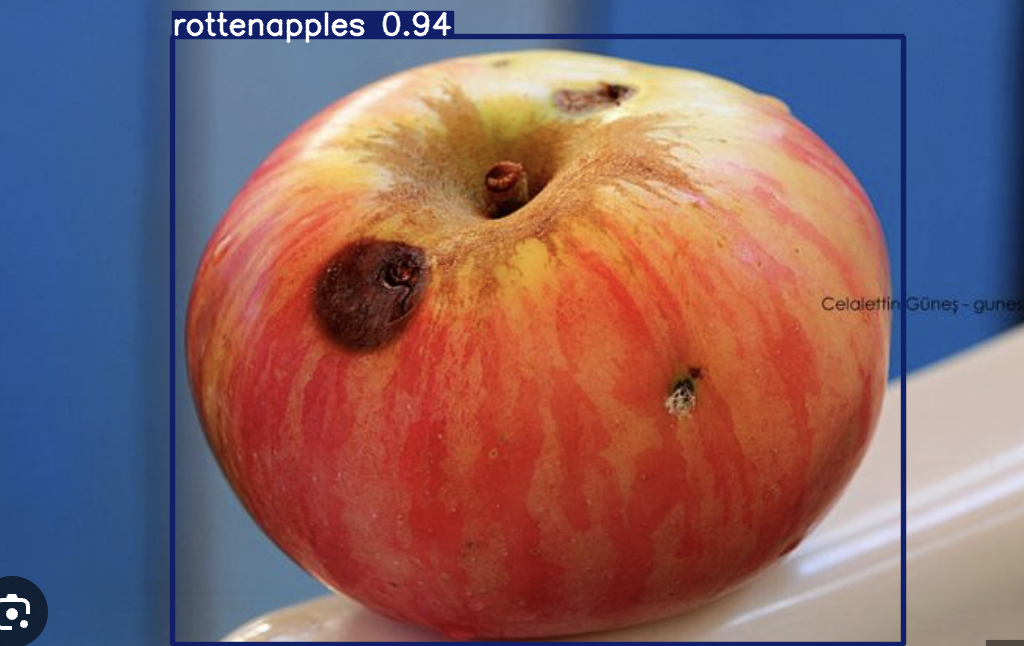

In [ ]:
from PIL import Image

resim_yolu = '/content/test_rotten_apple.png'


results = model.predict(source=resim_yolu, conf=0.25)


for r in results:
    im_array = r.plot()  
    im = Image.fromarray(im_array[..., ::-1])  
    display(im)